In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

P_bus_shed_set = pd.read_csv('P_bus_shed_set.csv')
# P_system_shed_set = pd.read_csv('P_system_shed_set.csv')
nB = P_bus_shed_set.shape[1]
n_scenario = len(P_bus_shed_set)
wcss = []

k_range = list(range(5, 55, 5))
for k in k_range:
      # Create random centers
      unique_random_nums = random.sample(range(0, n_scenario), k)
      # Apply k-means clustering
      kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
      kmeans.fit(P_bus_shed_set)
      y_kmeans = kmeans.predict(P_bus_shed_set)
      centers = kmeans.cluster_centers_
      wcss.append(kmeans.inertia_)

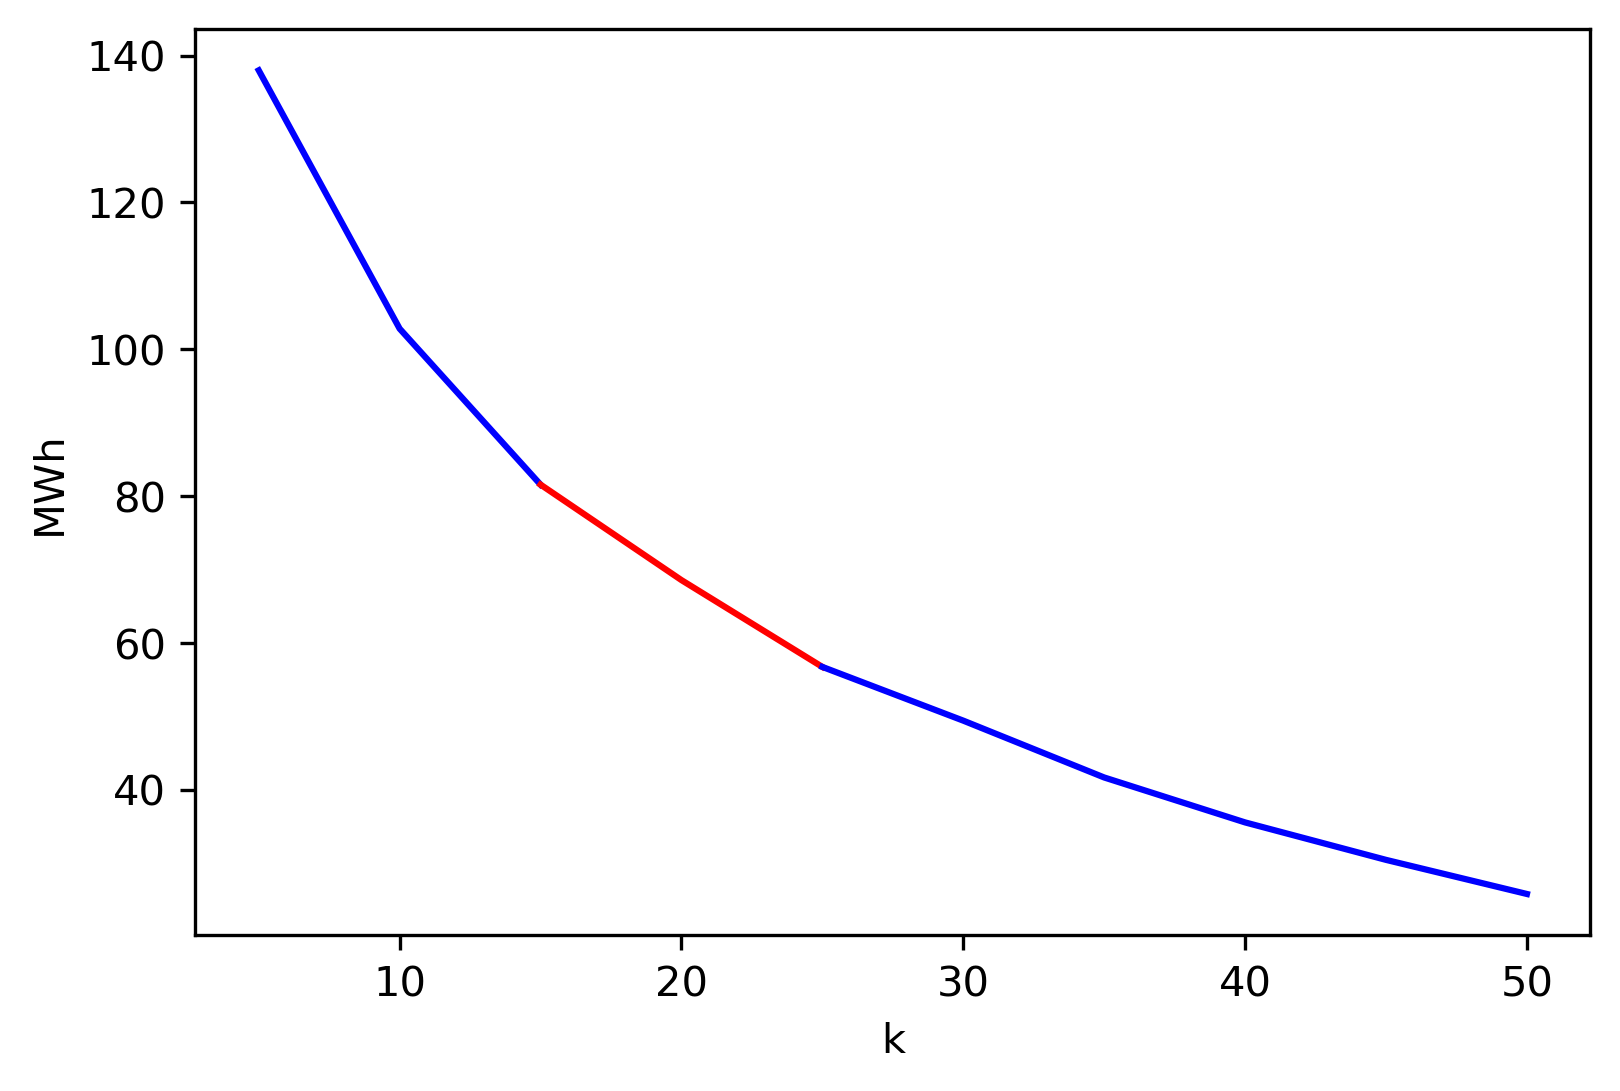

In [2]:
plt.plot(k_range[0:3], wcss[0:3], c='blue')
plt.plot(k_range[2:5], wcss[2:5], c='red')
plt.plot(k_range[4:], wcss[4:], c='blue')
plt.xlabel('k')
plt.ylabel('MWh')
plt.show()

Plot the original nodal load shedding curve and clustered load shedding curve

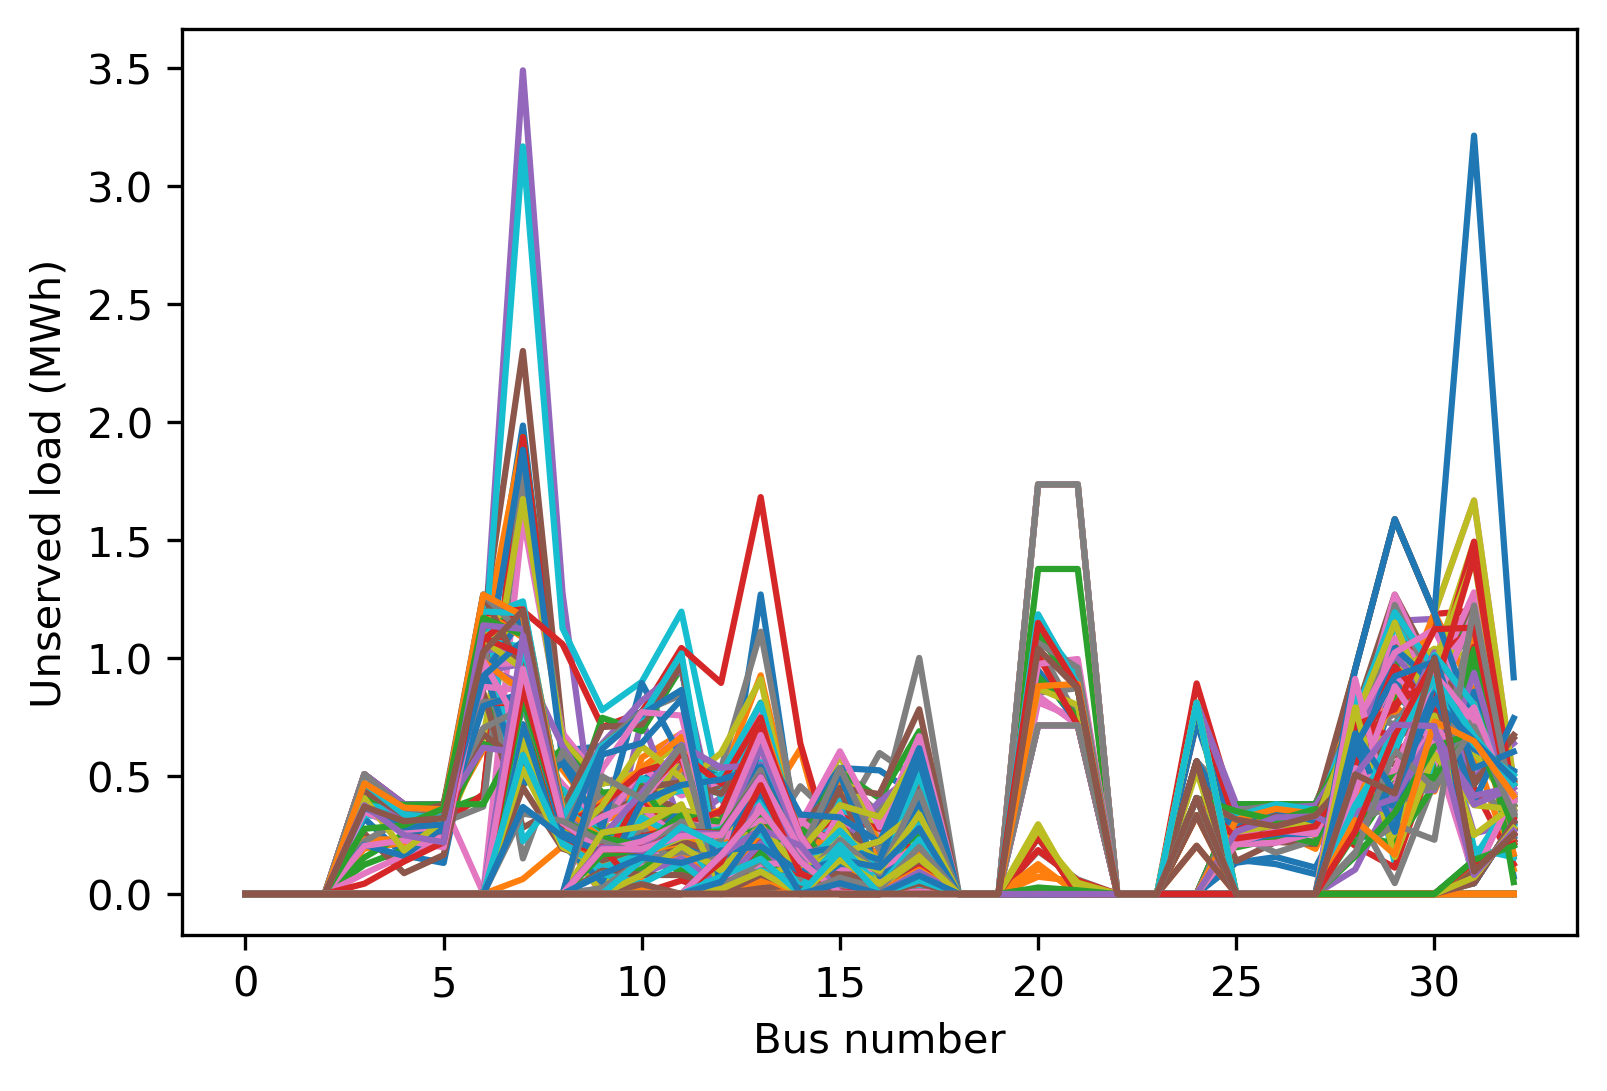

In [3]:
# Plot nodal unserved load at different node: original scenarios
P_bus_shed_set_np = P_bus_shed_set.values
node = range(nB)
for i in range(n_scenario):
      plt.plot(node, P_bus_shed_set_np[i])

plt.xlabel('Bus number')
plt.ylabel('Unserved load (MWh)')
plt.show()



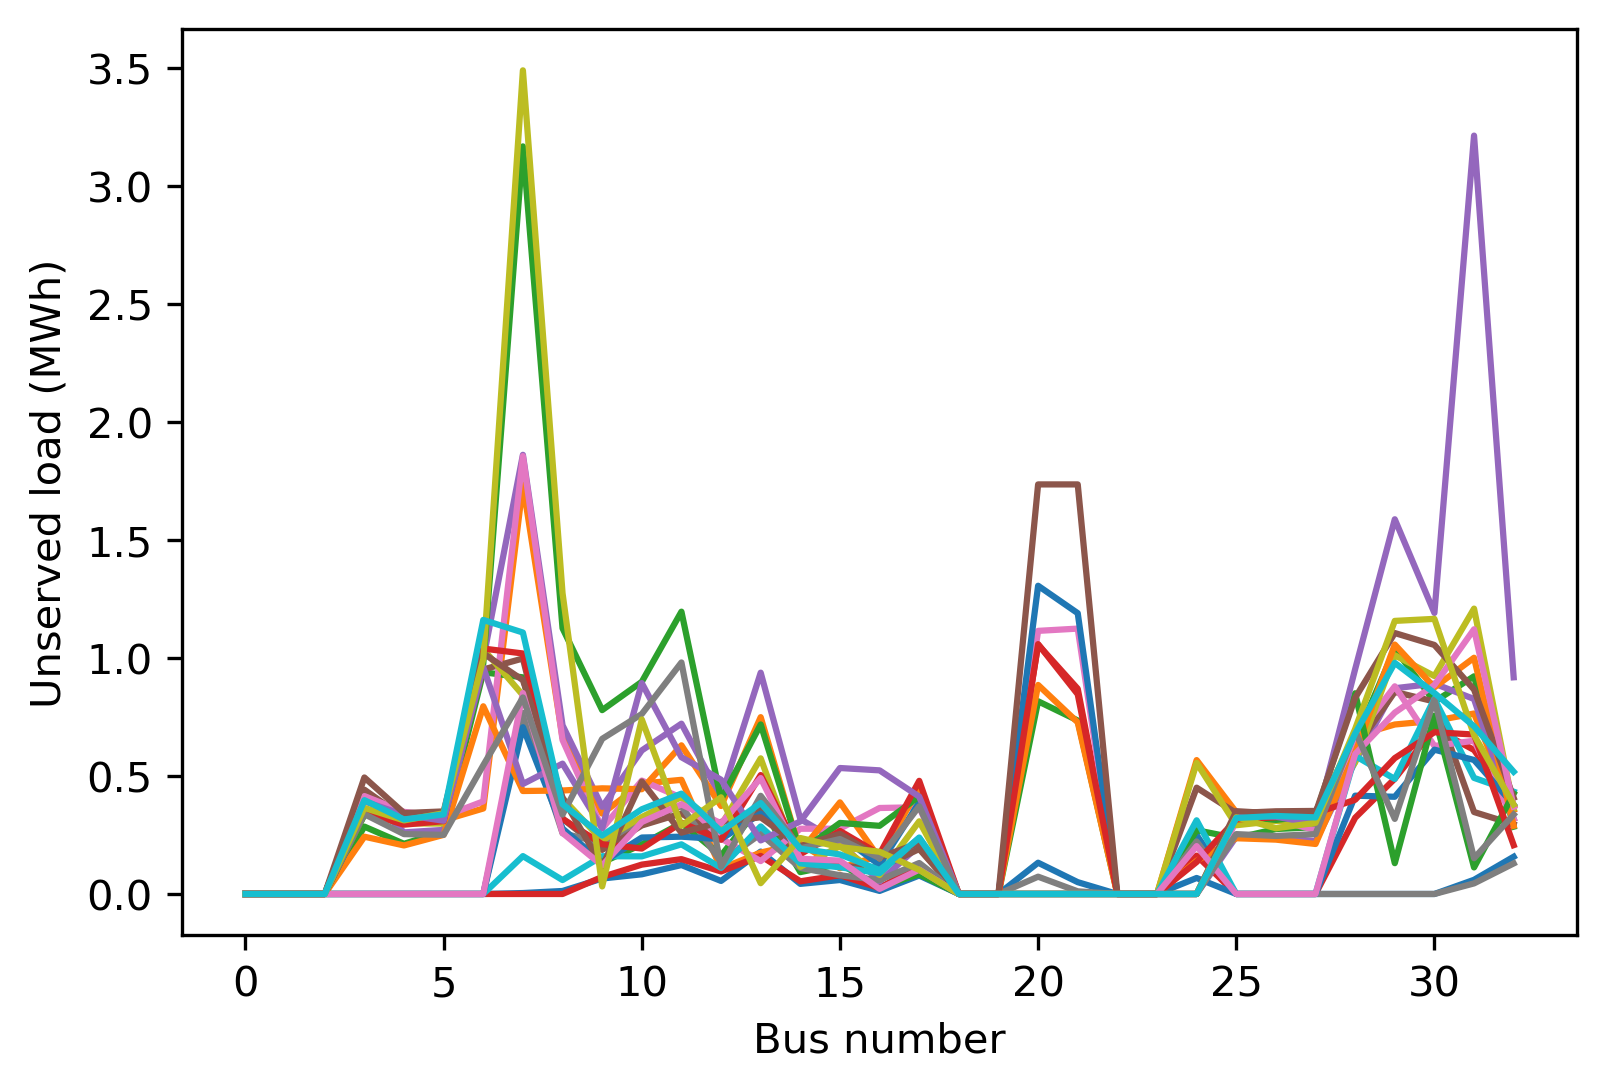

In [4]:
# Plot nodal unserved load at different node: clustered scenarios
k = 20
# Create random centers
unique_random_nums = random.sample(range(0, n_scenario), k)
# Apply k-means clustering
kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
kmeans.fit(P_bus_shed_set)
y_kmeans = kmeans.predict(P_bus_shed_set)
centers = kmeans.cluster_centers_

P_bus_shed_set_np = P_bus_shed_set.values
node = range(nB)
for i in range(k):
      plt.plot(node, centers[i])

plt.xlabel('Bus number')
plt.ylabel('Unserved load (MWh)')
plt.show()



In [5]:
# calculate EENS: original scenarios
print(sum(sum(P_bus_shed_set_np))/n_scenario)

# calculate EENS: after clustering
EENS_k15 = 0
for i in range(n_scenario):
      j = y_kmeans[i] 
      EENS_k15 = EENS_k15 + sum(P_bus_shed_set_np[j,:])

print(EENS_k15/n_scenario)

7.463410522574569
12.789735622323292


EENS range and probability

In [6]:
# Original scenarios
EENS_original = np.sum(P_bus_shed_set_np, axis=1)
EENS_original_prob = np.zeros((n_scenario,2))
for i in range(n_scenario):
      EENS_original_prob[i,0] = EENS_original[i]
      EENS_original_prob[i,1] = 1/n_scenario
# Cluster
EENS_cluster = np.sum(centers, axis=1)
unique, counts = np.unique(y_kmeans, return_counts=True)
EENS_cluster_prob = np.zeros((k,2))
for i in range(k):
      EENS_cluster_prob[i,0] = EENS_cluster[i]
      EENS_cluster_prob[i,1] = counts[i]/n_scenario


In [7]:
sorted_original = EENS_original_prob[EENS_original_prob[:, 0].argsort()[::-1]]
sorted_cluster = EENS_cluster_prob[EENS_cluster_prob[:, 0].argsort()[::-1]]


In [8]:
# Calculate distribution at different range
range1 = list(range(0,35,5))
# range1 = list(range(4,32,4))

prob_original = np.zeros(len(range1) - 1)
count_original = np.zeros(len(range1) - 1)
for i in range(len(range1) - 1):
      row_original = (sorted_original[:,0] >= range1[i]) & (sorted_original[:,0] <= range1[i+1])
      prob_original[i] = np.sum(sorted_original[row_original,1])
      count_original[i] = sum(row_original)
print(prob_original)
print(count_original)

prob_cluster = np.zeros(len(range1) - 1)
count_cluster = np.zeros(len(range1) - 1)
for i in range(len(range1) - 1):
      row_cluster = (sorted_cluster[:,0] >= range1[i]) & (sorted_cluster[:,0] <= range1[i+1])
      prob_cluster[i] = np.sum(sorted_cluster[row_cluster,1])
      count_cluster[i] = sum(row_cluster)

print(prob_cluster)
print(count_cluster)

[0.37301587 0.23809524 0.36507937 0.02380952 0.         0.        ]
[47. 30. 46.  3.  0.  0.]
[0.37301587 0.26984127 0.34920635 0.00793651 0.         0.        ]
[ 3.  5. 11.  1.  0.  0.]


In [9]:
print(sum(prob_original))
print(sum(prob_cluster))

0.9999999999999997
0.9999999999999999


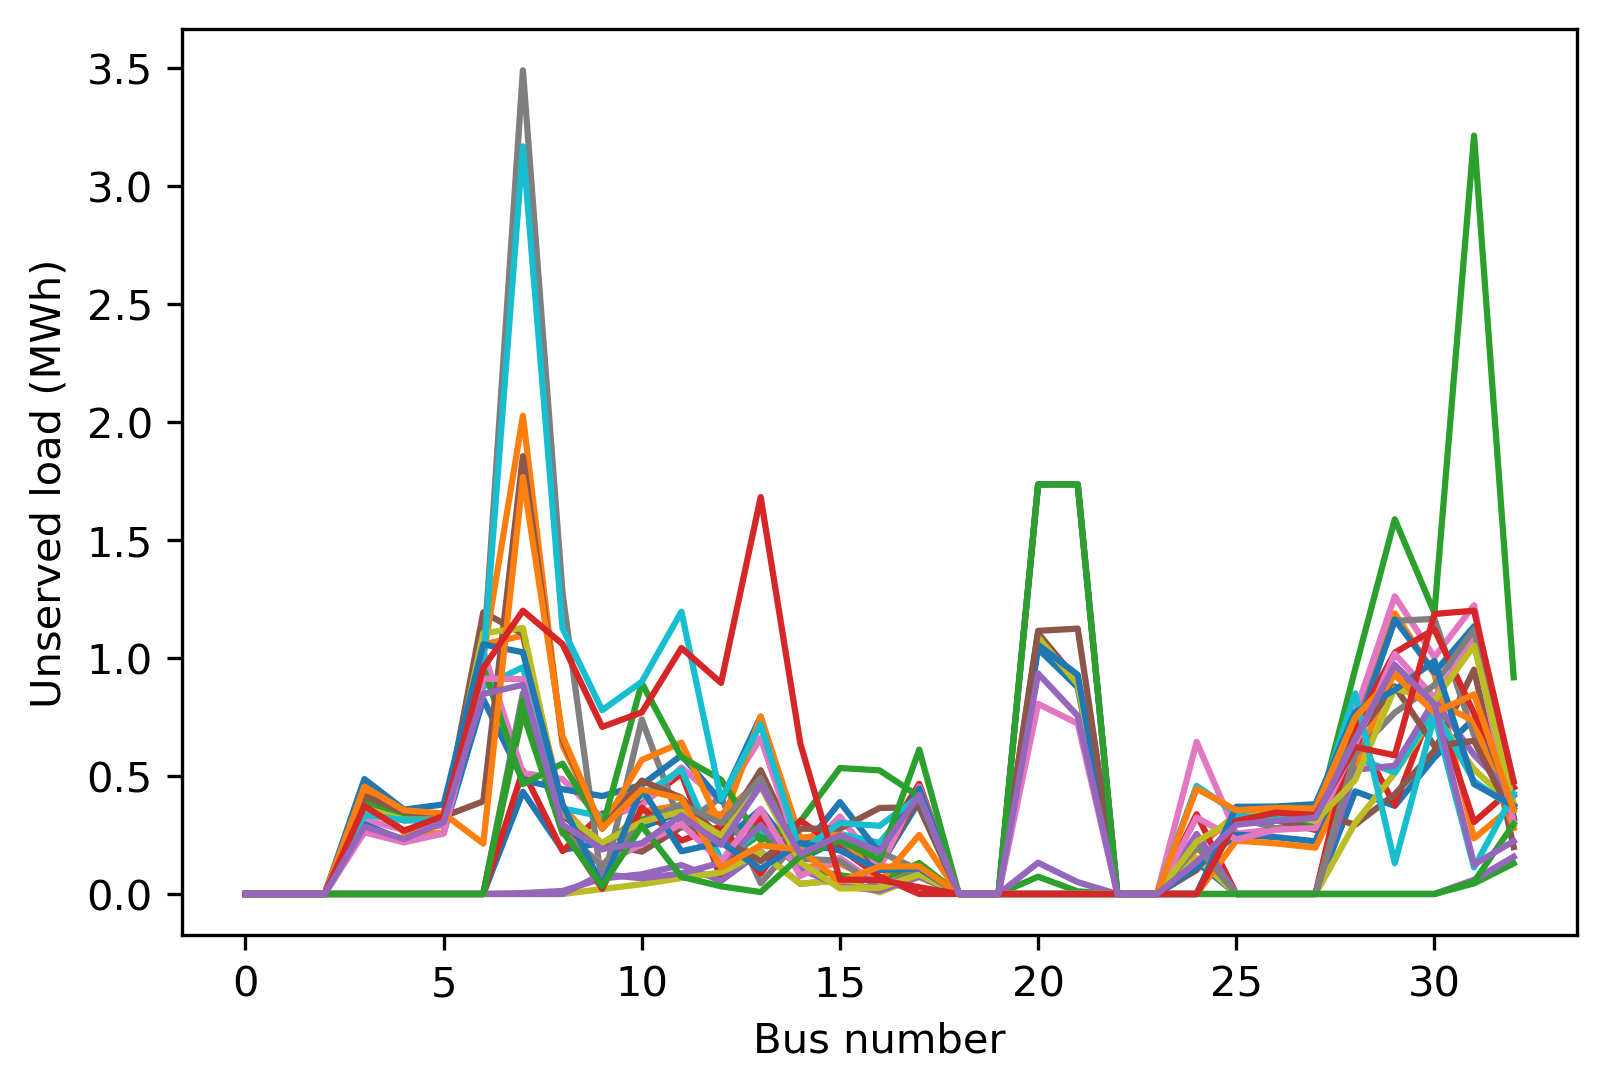

In [2]:
# Plot nodal unserved load at different node: clustered scenarios
k = 25
# Create random centers
unique_random_nums = random.sample(range(0, n_scenario), k)
# Apply k-means clustering
kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
kmeans.fit(P_bus_shed_set)
y_kmeans = kmeans.predict(P_bus_shed_set)
centers = kmeans.cluster_centers_

P_bus_shed_set_np = P_bus_shed_set.values




node = range(nB)
for i in range(k):
      plt.plot(node, centers[i])

plt.xlabel('Bus number')
plt.ylabel('Unserved load (MWh)')
plt.show()


In [3]:
for i in range(k):
      indices = np.where(y_kmeans == i)[0]
      print(indices)
      # P_bus_shed_set_np
      # sigma = 

[ 76  82  87  89  96 107]
[14 29 34 35 39 50]
[56 57 58 60 61 62 64 65 69 71 72 74 75 77 79 83 85 88]
[ 59  78  80  90  98 100]
[ 81  91  92  94  95  97  99 101 103 105 108 111 113 115 118 122]
[41 47 52 54]
[12 18 19]
[4]
[102 109 112 117 119 121 123 125]
[ 8 23 24 25 27 43 44 45 55]
[11 15 16 17 22]
[ 0  1  5 10]
[20]
[66]
[ 93 104 106 110 114 116 120 124]
[2 7]
[26 30 36 40 46]
[63 68 70 73 84 86]
[21 28 33 37 38 49 51]
[9]
[31 32]
[3 6]
[67]
[13]
[42 48 53]
